In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import simplefilter
simplefilter("ignore")
import numpy as np

In [2]:
df = pd.read_csv("AppleStore.csv")
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


In [23]:
most_rated = df.sort_values('rating_count_tot',ascending=False).head(15).drop('Unnamed: 0',axis = 1)


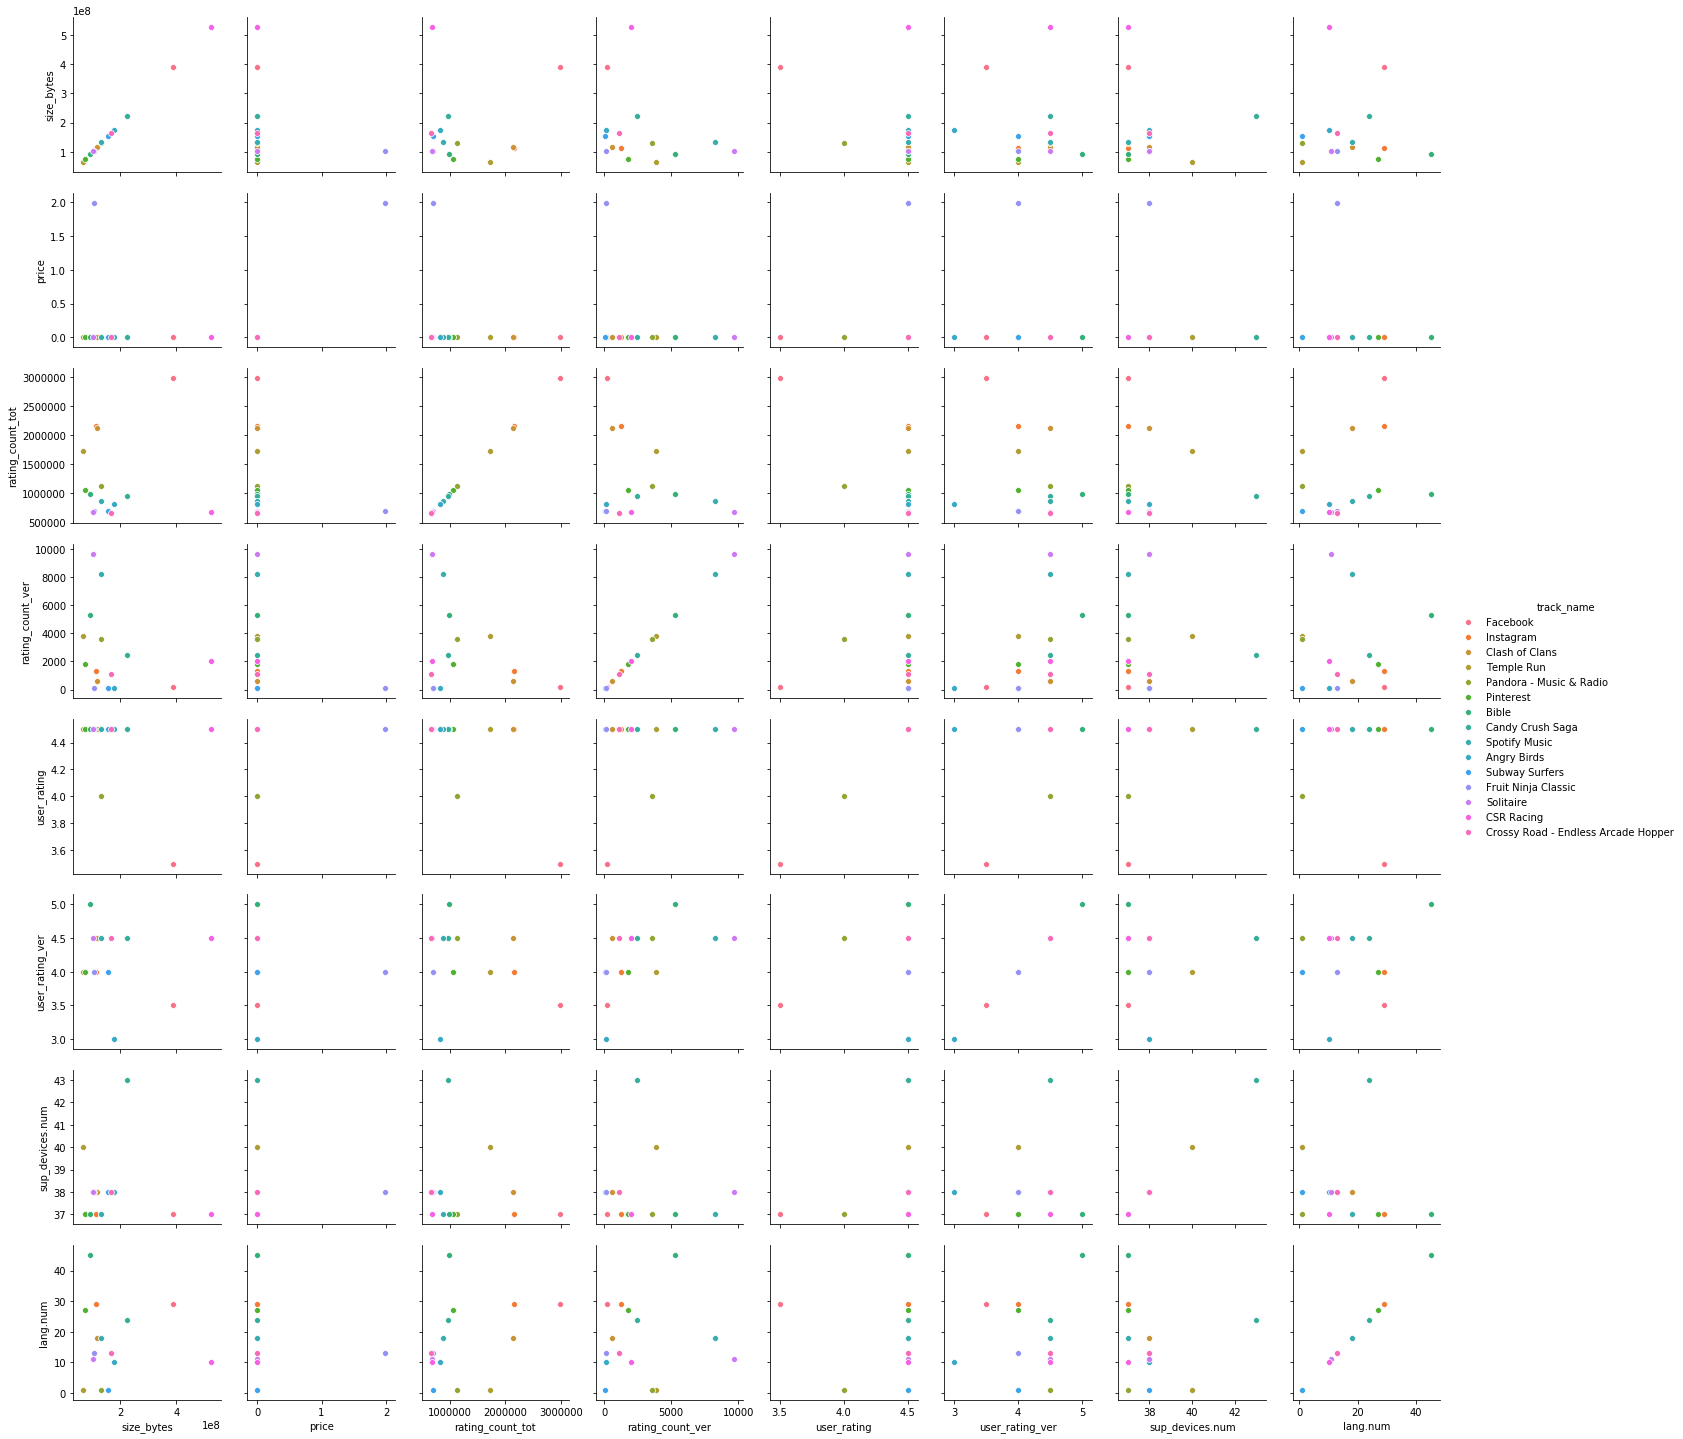

In [5]:
pg = sns.PairGrid(most_rated,hue = "track_name")
pg.map(sns.scatterplot)
pg.add_legend()

In [6]:
top_20_rated = df.sort_values('user_rating',ascending=False).head(20).drop('Unnamed: 0',axis = 1)

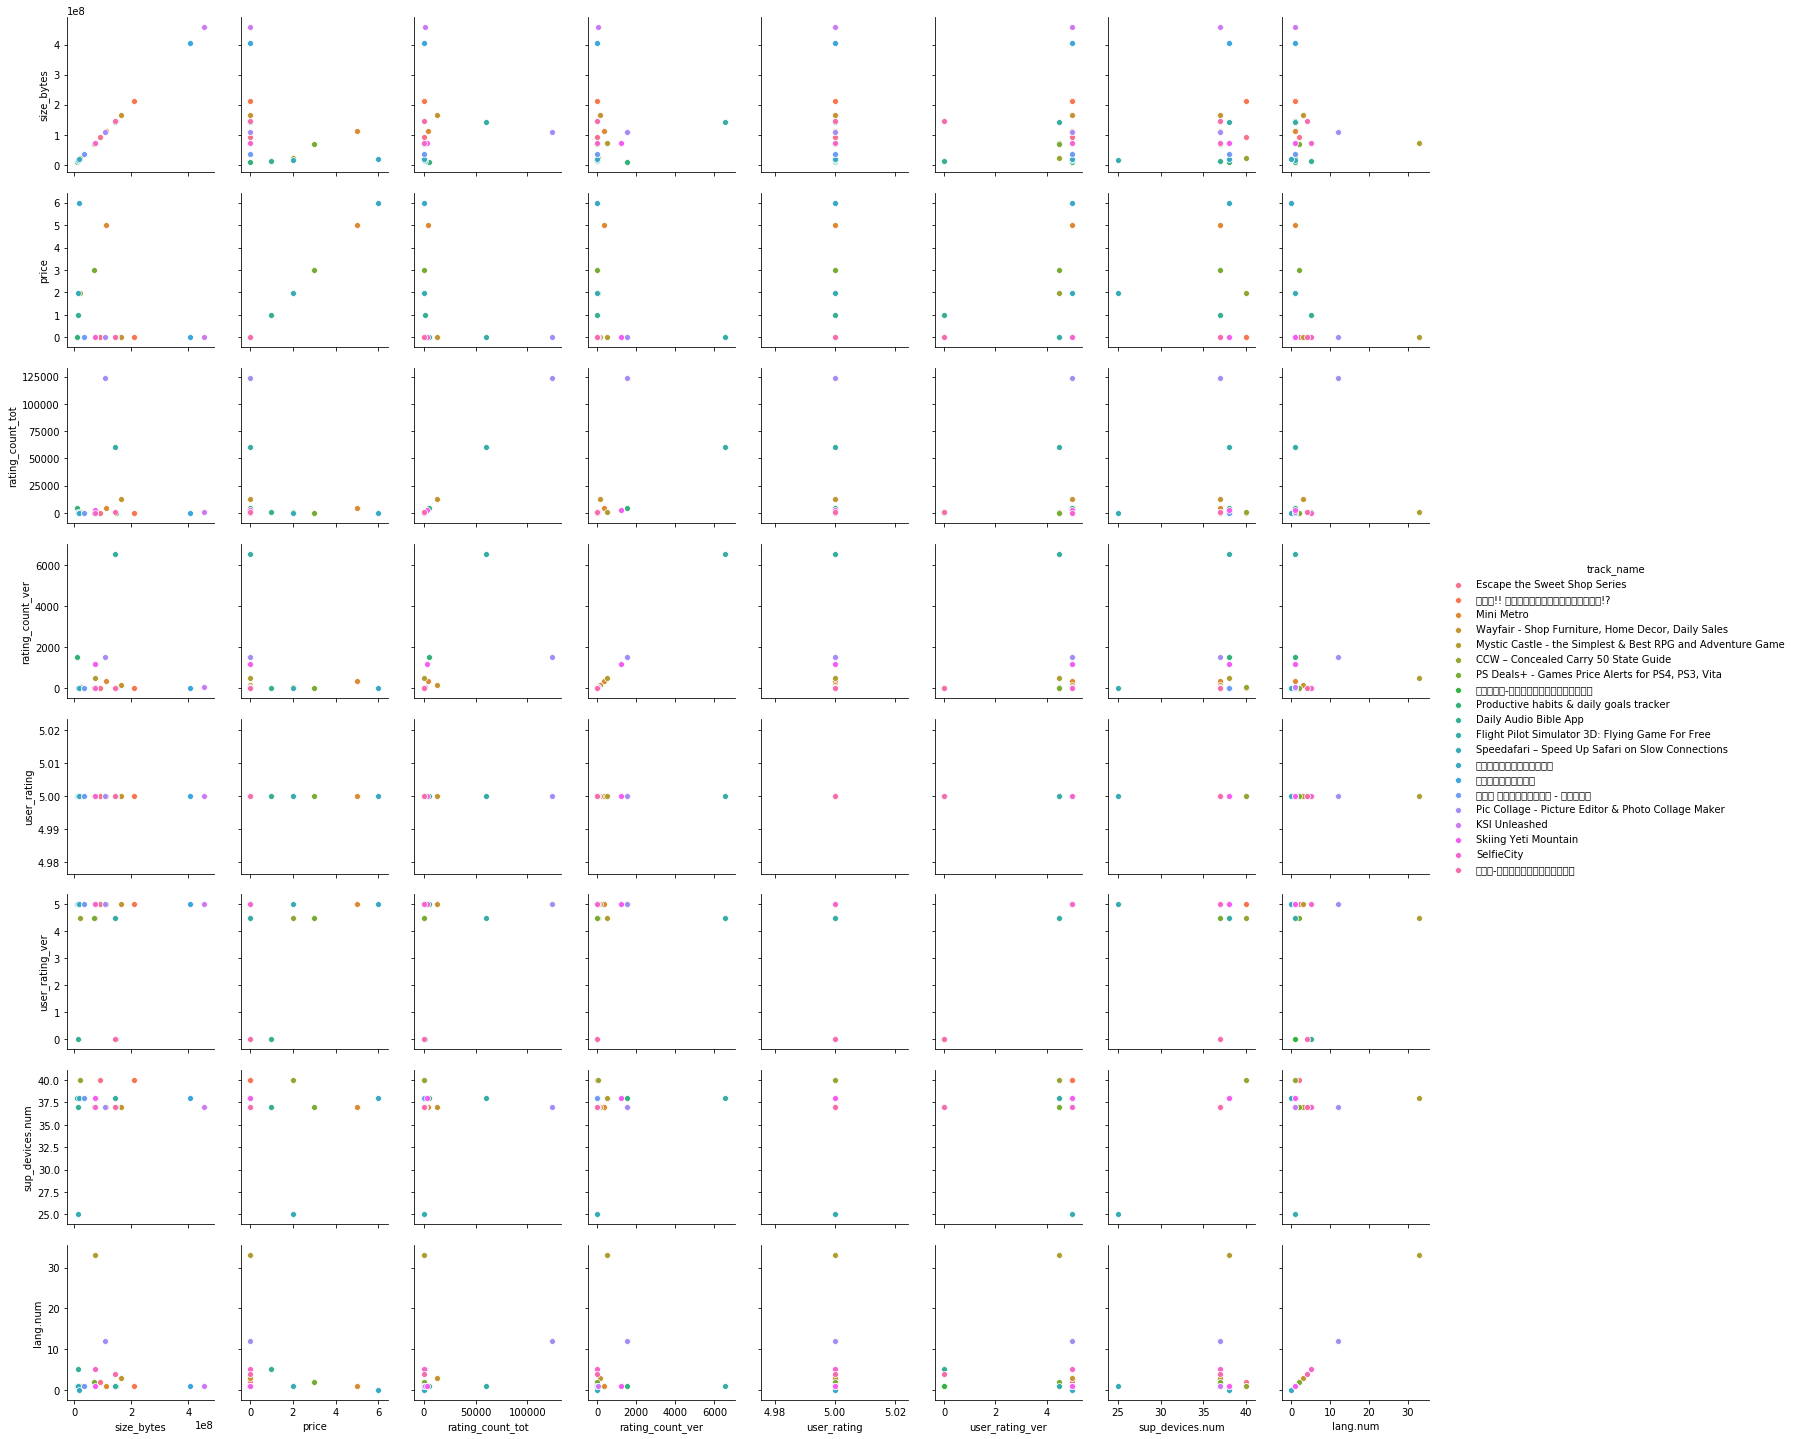

In [7]:
pg2 = sns.PairGrid(top_20_rated ,hue= "track_name")
pg2.map(sns.scatterplot)
pg2.add_legend()

In [8]:
a = df['prime_genre'] == 'Games'
b = df['price'] == 0
c = a & b
free_games = df[c]

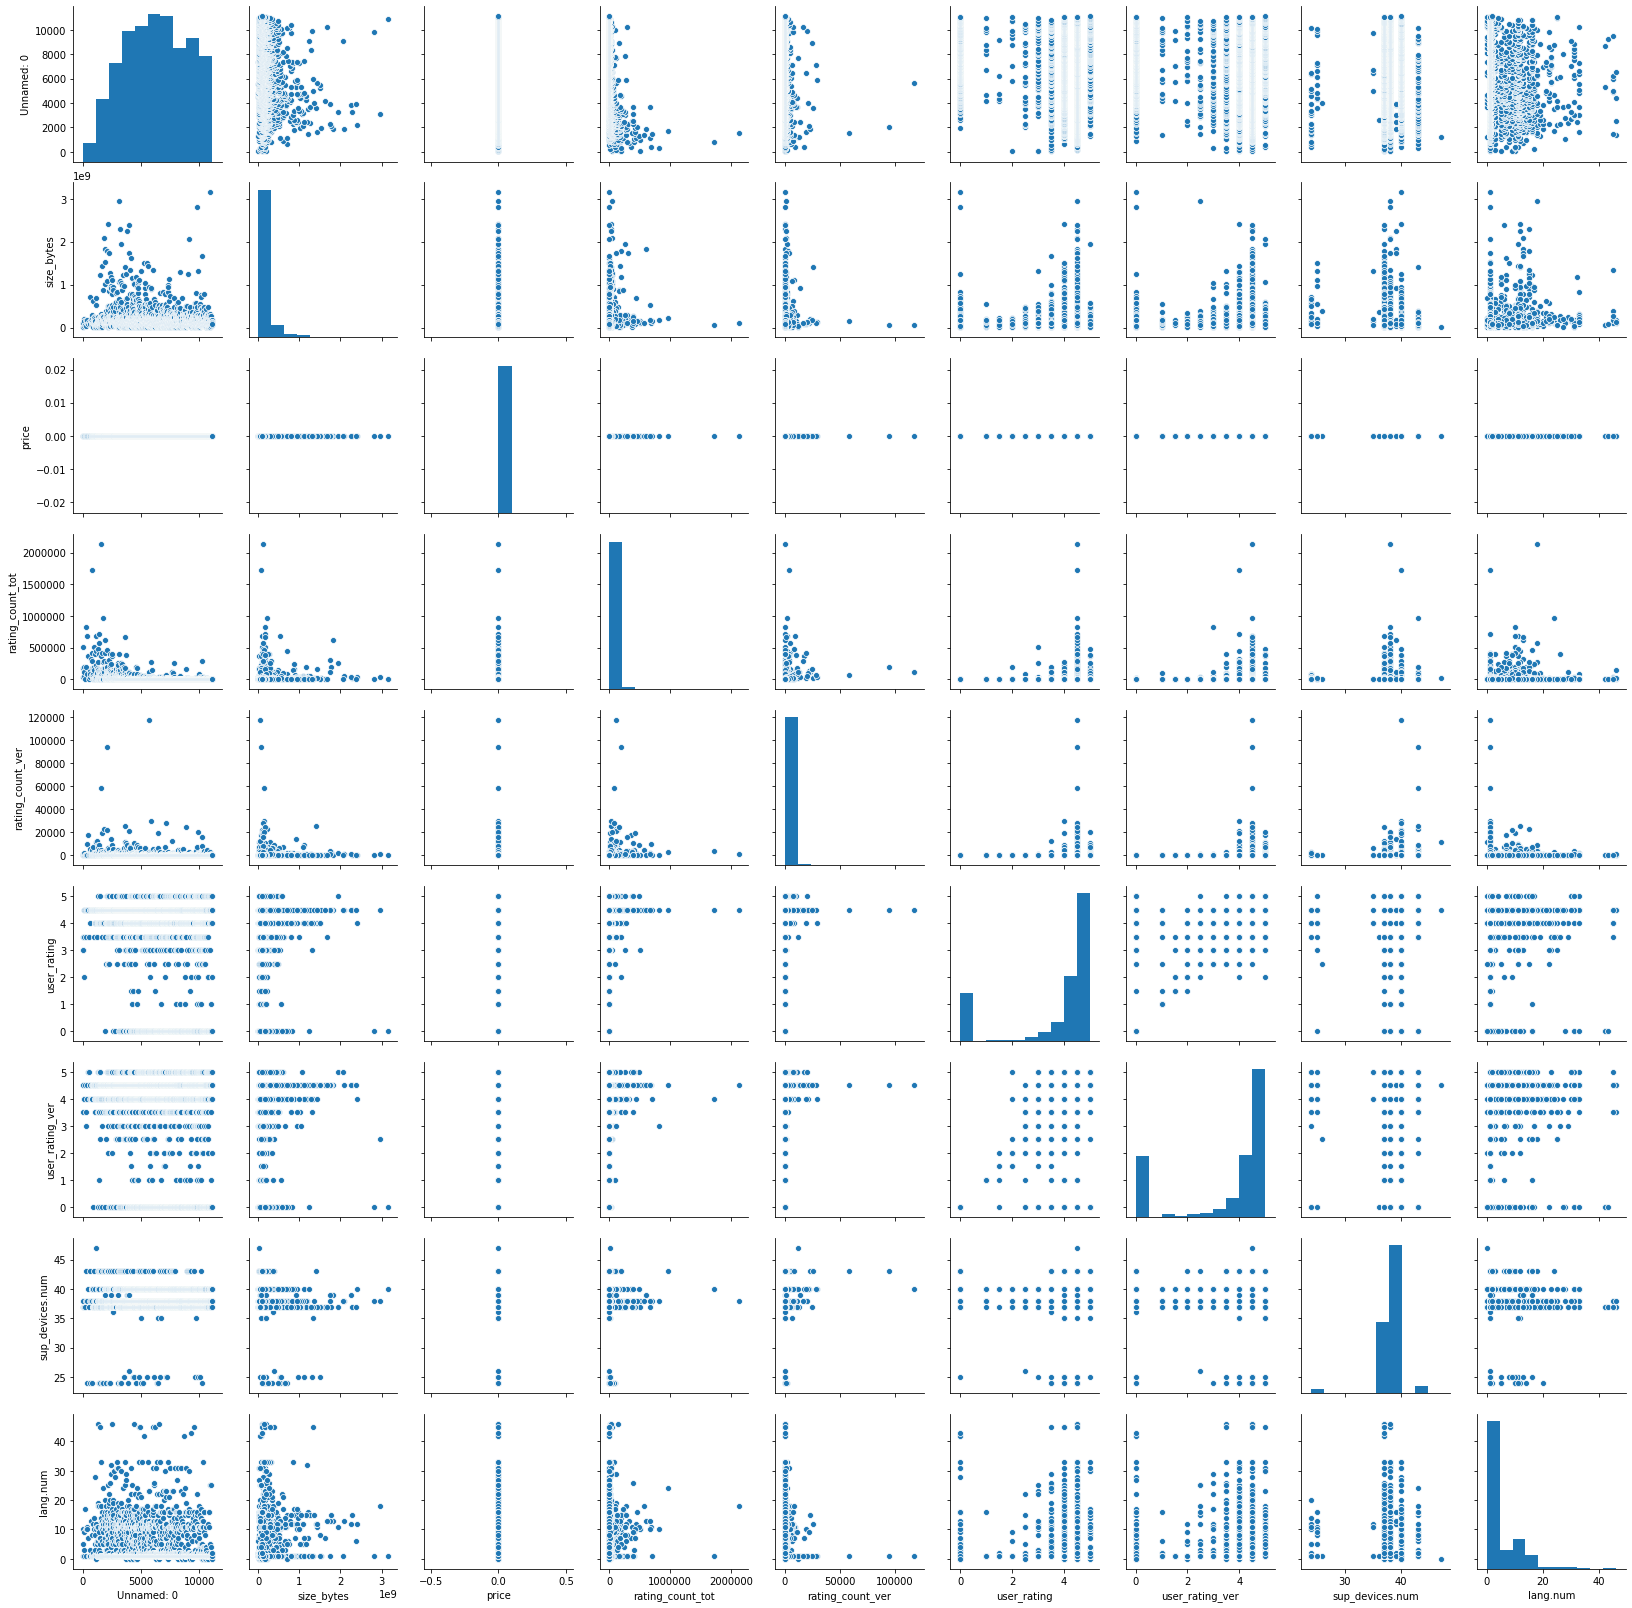

In [9]:
sns.pairplot(free_games)

In [10]:
d = df['price'] > 0 
e = d & a
paid_games = df[e]

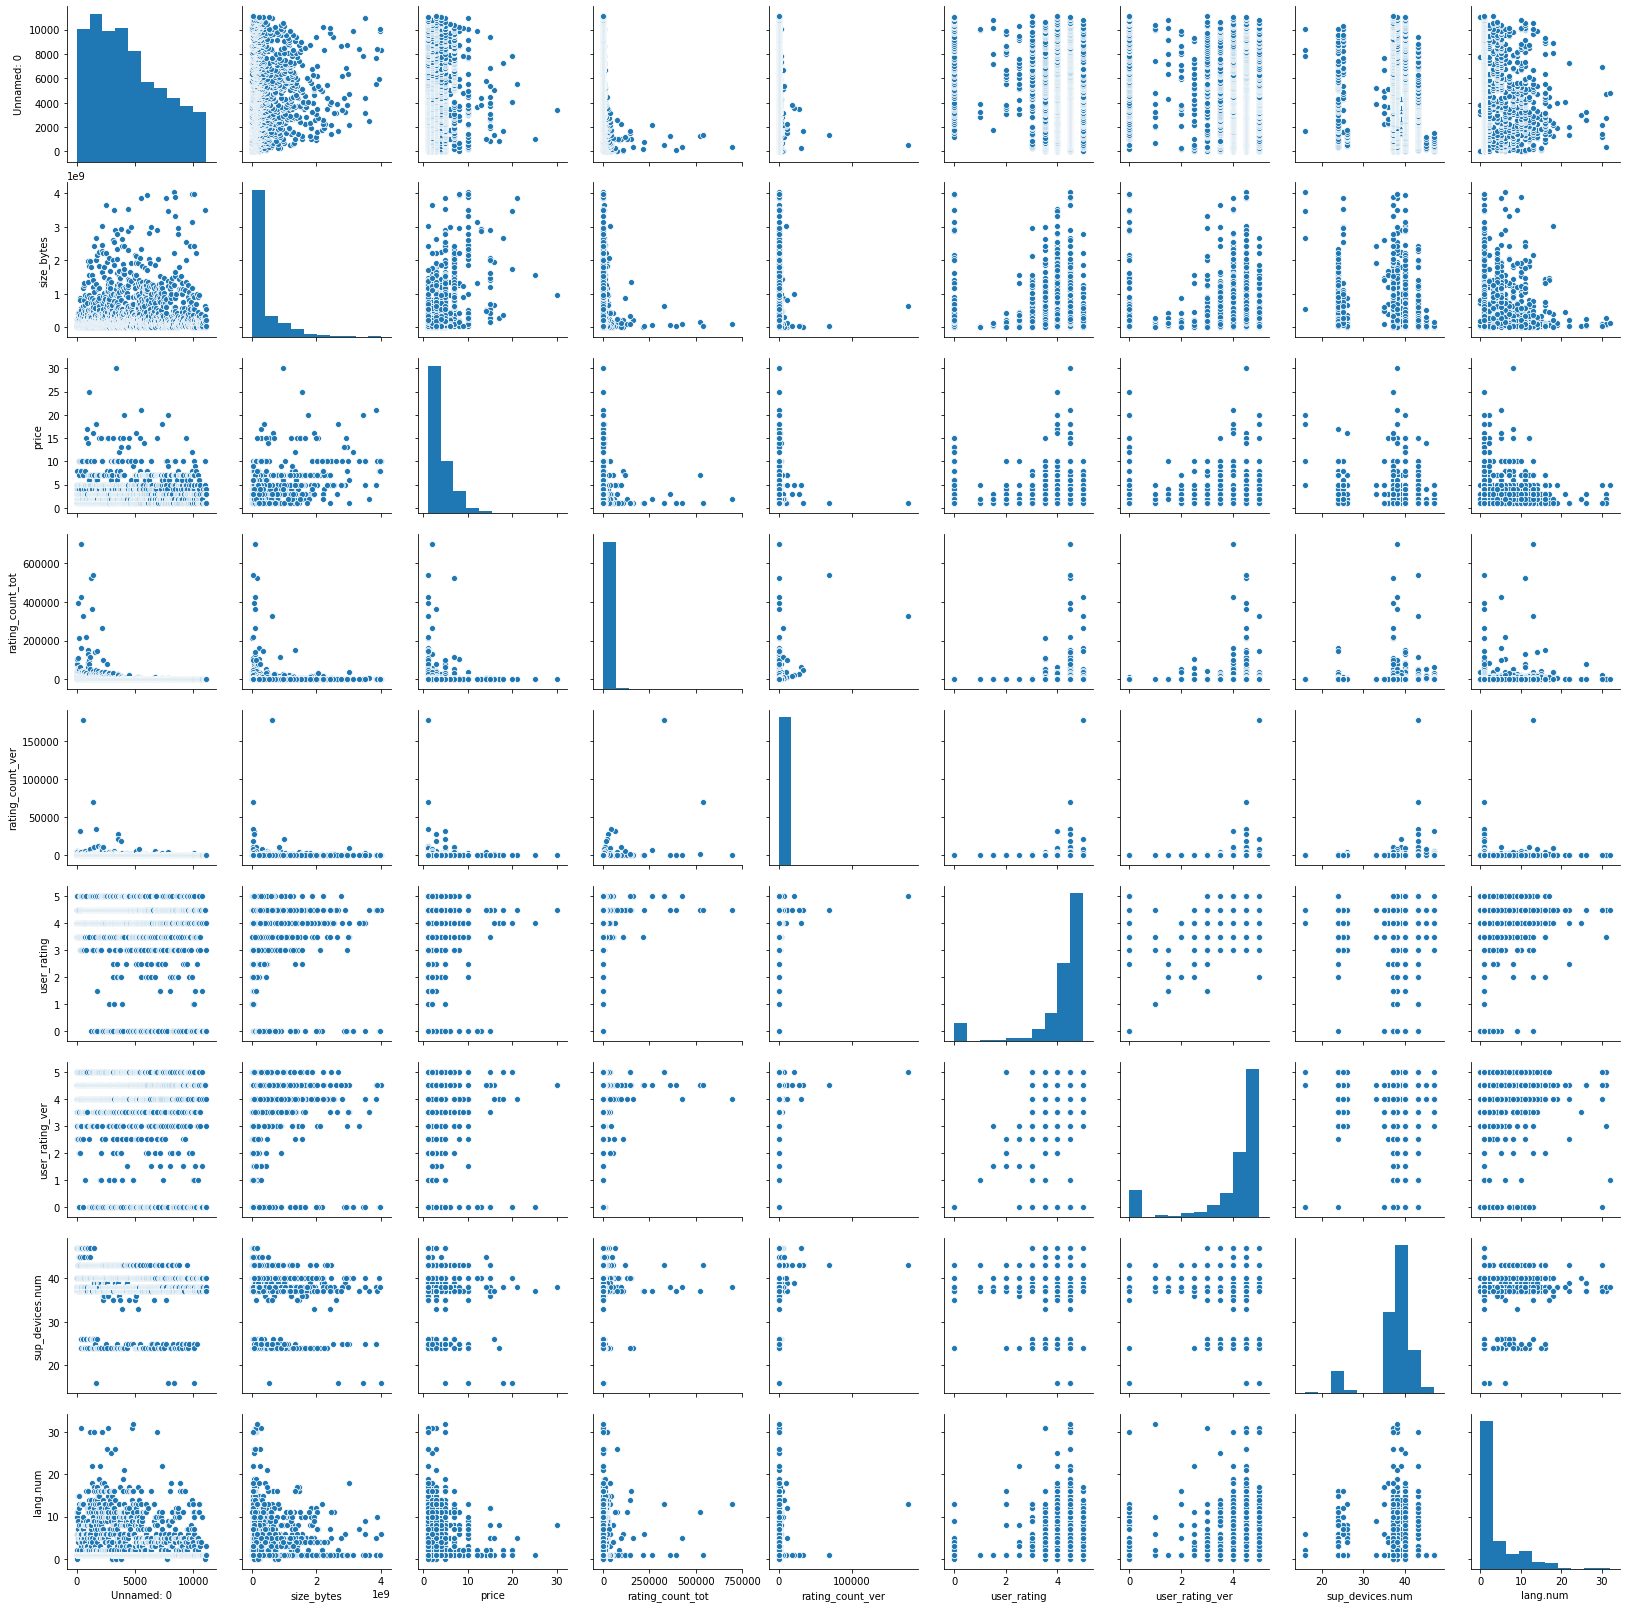

In [11]:
sns.pairplot(paid_games)

In [12]:
#dir(sns)

In [13]:

import math

In [14]:

df2 = df.groupby('prime_genre').sum()
df4 = df2.loc[['Games','Education','Music','Entertainment']]
df3 = df2.drop(['Games','Education','Music','Entertainment'])
x = df2.price.sum()
labels_1 = []
for i,j in zip(df3.index,df3['price']):
    t = (j/x)*100
    t = math.floor(t)
    j = math.floor(j)
    labels_1.append("{},{},{}%".format(i,j,t))
labels_1
labels_2 = []
for i,j in zip(df4.index,df4['price']):
    t = (j/x)*100
    t = math.floor(t)
    j = math.floor(j)
    labels_2.append("{},{},{}%".format(i,j,t))

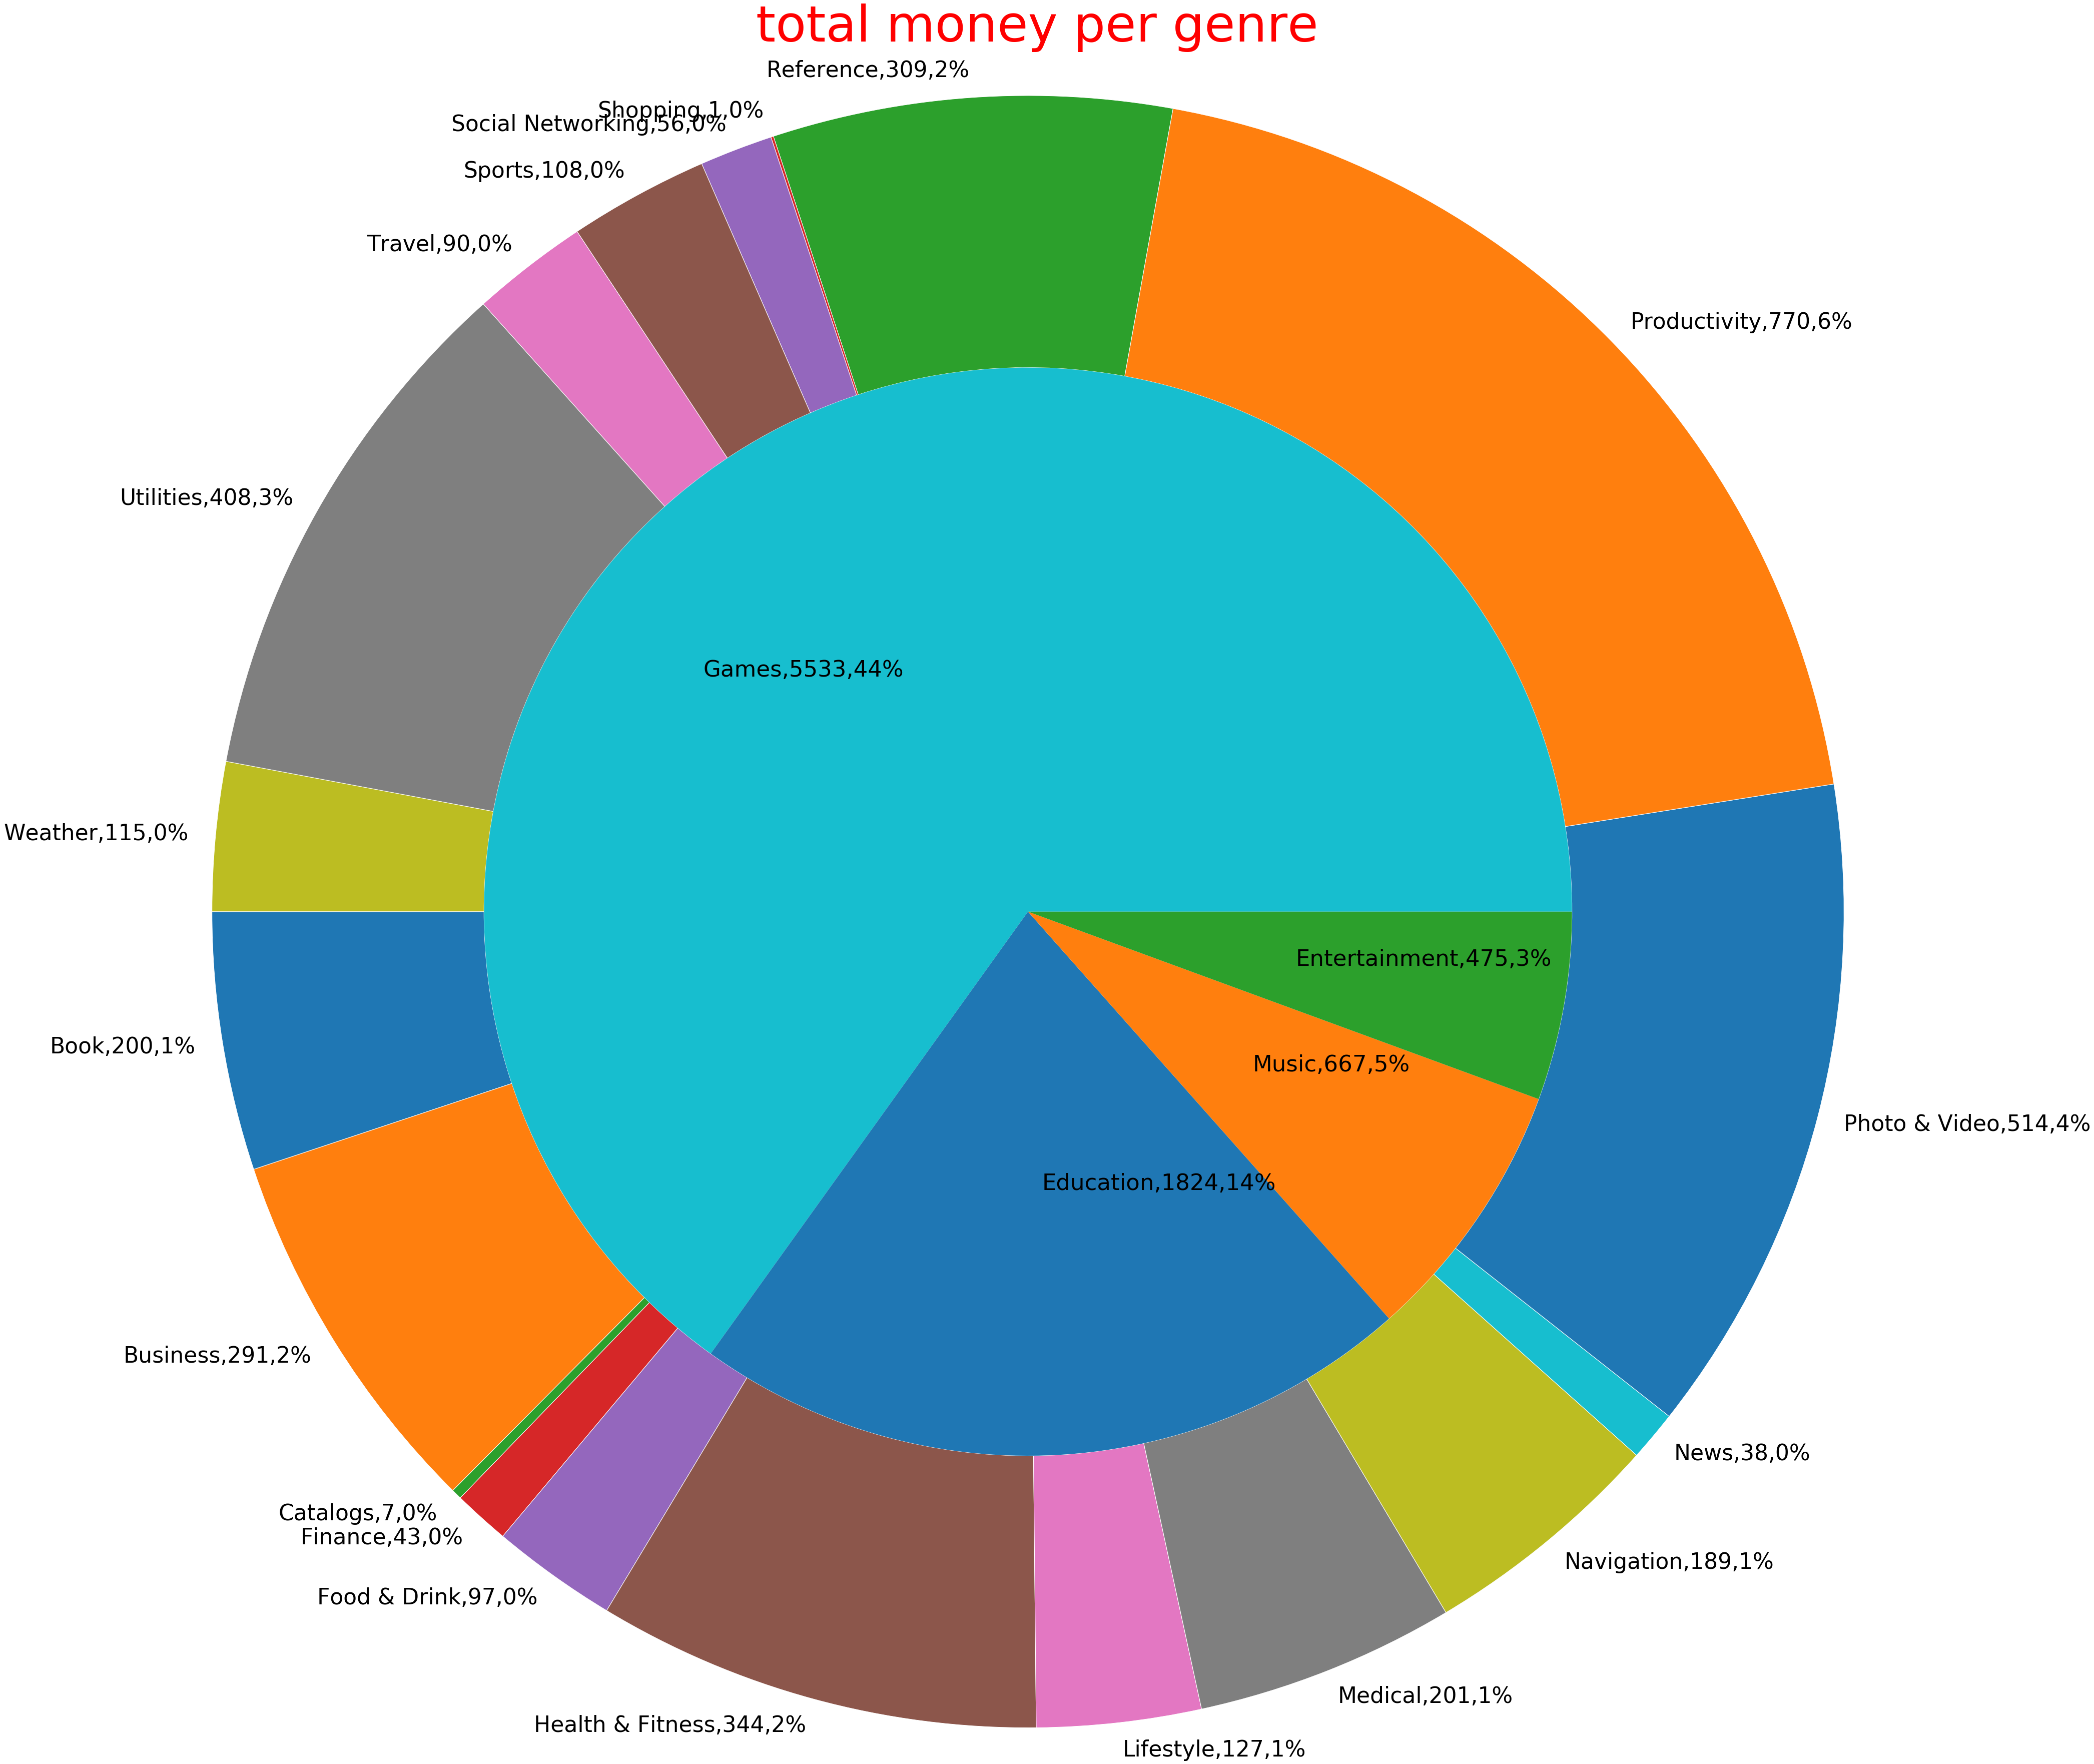

In [15]:
fig , ax  = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50))
_,texts = ax.pie(df3['price'],labels = labels_1,radius = -1,pctdistance=0.1,wedgeprops=dict(width=0.5, edgecolor='w'),
                 labeldistance = 1.55)
ax.set_title = plt.text(-0.5,1.6,'total money per genre ',color = 'r',size = 100)
for i in range(len(texts)):
    texts[i].set_fontsize(44)
_,texts = plt.pie(df4['price'],labels = labels_2,labeldistance = 0.5)
for i in range(len(texts)):
    texts[i].set_fontsize(45)

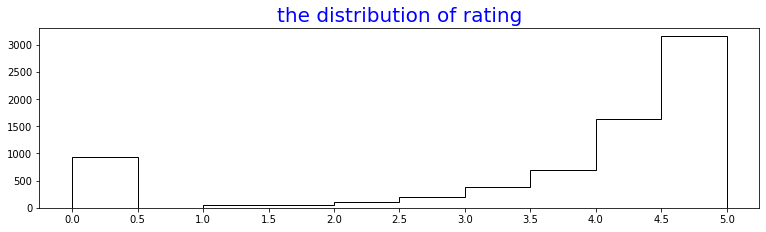

In [16]:

fig = plt.figure(figsize = (5,5))

ax_1 = fig.add_axes([1,1,2,0.5])

ax_1.hist(df.user_rating,bins = 10,label = "the distribution of raiting",color = 'k',histtype ='step')
ax_1.set_title("the distribution of rating",size = 20,c = 'b')
ax_1.set_xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])

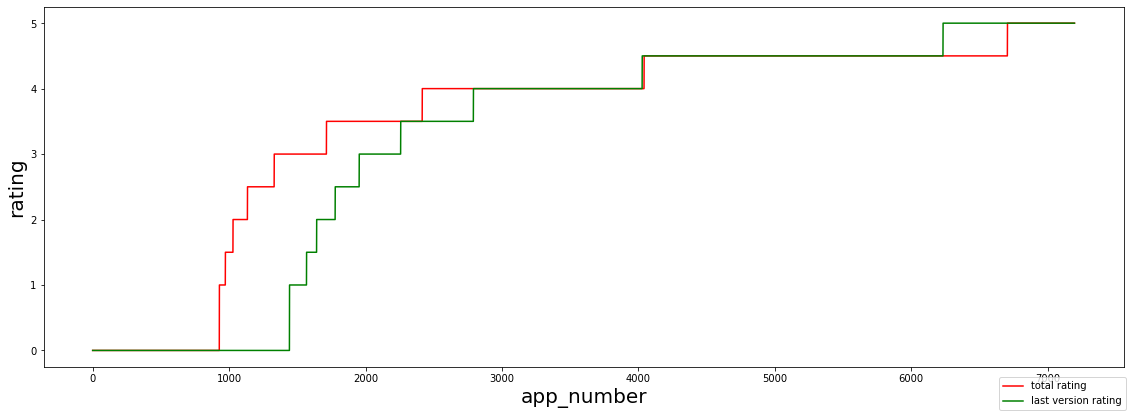

In [17]:
x = [i for i in range(df.shape[0])]
y_1 = df.user_rating.sort_values()
y_2 = df.user_rating_ver.sort_values()

fig = plt.figure(figsize = (5,5))

ax_1 = fig.add_axes([0,0,3,1])
ax_1.plot(x,y_1,c = 'r',label ="total rating" )
ax_1.set_xlabel('app_number',size = 20)
ax_1.set_ylabel("rating",size = 20)
ax_2 = fig.add_axes([0,0,3,1])
ax_2.plot(x,y_2,c = 'g',label = "last version rating")
fig.legend(loc = 4)

In [18]:
count = df.groupby('prime_genre').count()
h = count.price.sort_values(ascending=False).head(5)
x = h.index

Text(0, 0.5, 'number of apps')

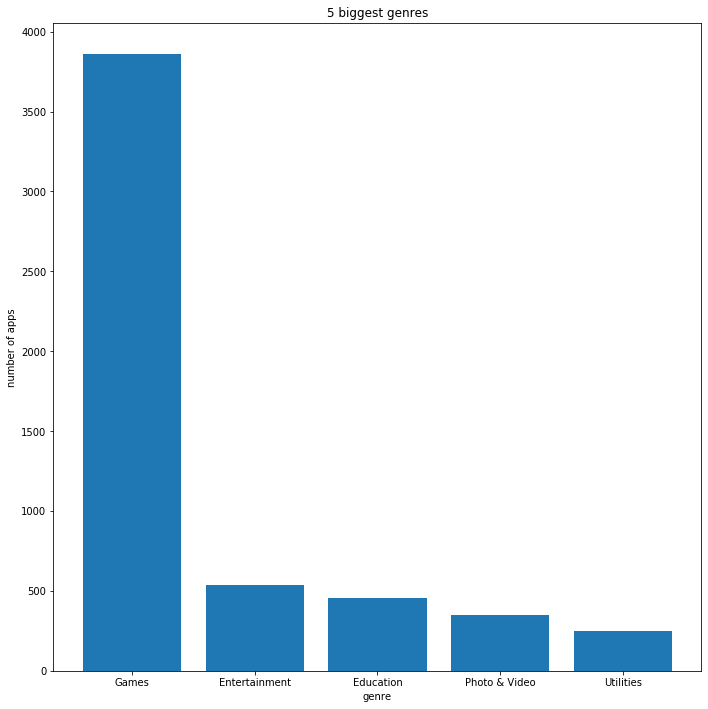

In [19]:
fig = plt.figure(figsize = (3,3))
ax = fig.add_axes([0,0,3,3])
ax.bar(x = x,height = h)
ax.set_title( "5 biggest genres")
ax.set_xlabel("genre")
ax.set_ylabel("number of apps")

In [20]:
h = count.sort_values('price',ascending=False).head(5)
i = h.index
ls = []
for j in i:
    s_1 = df['prime_genre'] == j 
    ls.append(s_1)
for j in ls:
    s_1 = j+s_1
df10 = df[s_1]

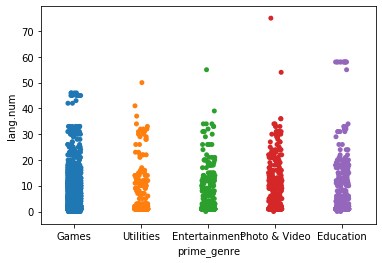

In [21]:
sns.stripplot(data = df10,x = 'prime_genre',y = 'lang.num',)

Text(0.5, 1.0, 'the distribution of the 50 highest prices')

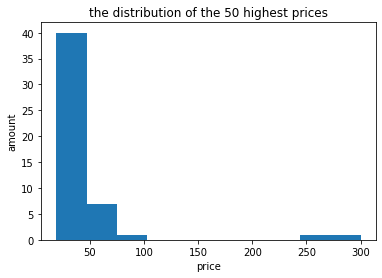

In [22]:
x = df.price.sort_values(ascending=False).head(50)
plt.hist(x)
plt.xlabel("price")
plt.ylabel("amount")
plt.title("the distribution of the 50 highest prices")

In [25]:
games = df[df.prime_genre == 'Games']

Text(0.5, 1.0, 'rating  per  total rating count in games')

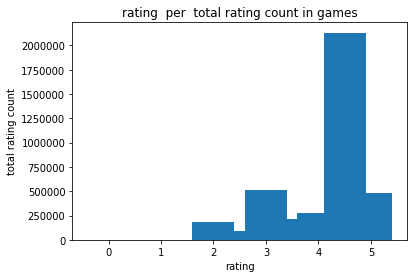

In [36]:
plt.bar(x = games.user_rating,height = games.rating_count_tot)
plt.xlabel("rating")
plt.ylabel("total rating count")
plt.title("rating  per  total rating count in games")

Text(0.5, 1.0, 'rating per price in games')

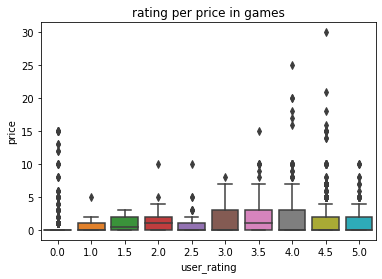

In [37]:
sns.boxplot(data = games,x = "user_rating",y = 'price')
plt.title("rating per price in games")